# Menyelesaikan Sudoku dengan AI

Ya, Bismillah.

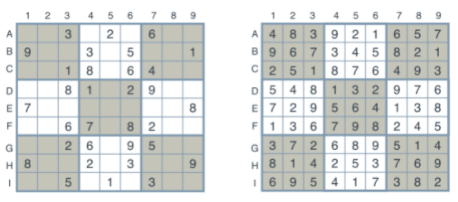

**Penamaan**
- **Baris** dilabeli oleh alfabet A, B, C, D, E, F, G, H, I
- **Kolom** dilabeli oleh angka 1, 2, 3, 4, 5, 6, 7, 8, 9
- **Boks** adalah setiap kotak individual pada papan sudoku
- Baris, kolom, dan kotak 3x3 adalah **unit**. Jadi, untuk setiap unit, terdapat 9 box.
- Untuk suatu box, dia punya sekelompok **kawan**, yaitu box lain yang terdapat dalam satu unit dengannya.
	- Artinya, setiap box masing-masing punya 20 kawan. (8 di dalam kotak 3x3, 6 lainnya dari unit baris, 6 lainnya dari unit kolom)

Kita akan mengkodekan papan Sudoku ke program, lalu menuliskan fungsi-fungsi yang dibutuhkan untuk menyelesaikan Sudoku-nya.

Mari gunakan tipe data `string` dan `dictionary` untuk merekam setiap hal atau *state* dari papan Sudoku.

String yang akan kita buat adalah konkatenasi dari semua digit per baris. Jika pada suatu box belum diisi angka, kita gunakan `.` sebagai representasi box kosong.

Contohnya, pada gambar papan Sudoku di atas, kondisi papan ditulis sebagai:

`..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..`

Dan papan yang sudah diselesaikan disimpan sebagai:

`483921657967345821251876493548132976729564138136798245372689514814253769695417382`

Untuk `dictionary`-nya sendiri, keys-nya adalah almat box, seperti `A1`, `B3`, `F5`. Value setiap key adalah digit yang ada di dalam box atau `.` bagi box yang masih kosong.

In [1]:
# pertama, simpan nama baris dan kolom sebagai string
baris = 'ABCDEFGHI'
kolom = '123456789'

Selanjutnya, kita akan menulis fungsi pembantu, `kali_silang(a, b)` yang menerima dua string `a` dan `b`, dan mengembalikan semua kemungkinan konkantenasi antara huruf `x` di `a` dengan huruf `y` di `b`.

Misalnya, `kali_silang('ab', 'cde')` akan menghasilkan `['ac', 'ad', 'ae', 'bc', 'bd', 'be']`

In [2]:
def kali_silang(a, b):
    return [x+y for x in a for y in b]

In [3]:
boks = kali_silang(baris, kolom)
print(boks)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']


In [4]:
unit_baris = [kali_silang(b, kolom) for b in baris]
unit_kolom = [kali_silang(baris, k) for k in kolom]

kelompok_baris = ('ABC', 'DEF', 'GHI')
kelompok_kolom = ('123', '456', '789')

unit_kotak = [kali_silang(kb, kk) for kb in kelompok_baris \
                  for kk in kelompok_kolom]

daftar_unit = unit_baris + unit_kolom + unit_kotak

print('Kawan-kawan boks A1:')
print(unit_baris[0])
print(unit_kolom[0])
print(unit_kotak[0])

Kawan-kawan boks A1:
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']
['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1']
['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']


In [5]:
def kawan(s):
    kawan_ = []
    for unit in daftar_unit:
        if s in unit: kawan_.extend(unit)
    return [k for k in kawan_ if k != s]

r = kawan('A4')
print(r)

['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6']


Nah, tadi kita menyimpan *state* papan pada satu string konkatenasi digit setiap boks per baris.

``` python
grid_values('..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..')

{
  'A1': '.'
  'A2': '.',
  'A3': '3',
  'A4': '.',
  'A5': '2',
  ...
  'I9': '.'
}

```

In [6]:
def nilai_boks(state):
    assert len(state) == 81
    d = dict(zip(boks, state))
    
    # kita ganti '.' dengan '123456789'
    # untuk mencatat semua kemungkinan digit
    # pada boks tersebut
    for b in d:
        if d[b] == '.':
            d[b] = '123456789'
    return d

s = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
nilai_1 = nilai_boks(s)
print(nilai_1)

{'A1': '123456789', 'A2': '123456789', 'A3': '3', 'A4': '123456789', 'A5': '2', 'A6': '123456789', 'A7': '6', 'A8': '123456789', 'A9': '123456789', 'B1': '9', 'B2': '123456789', 'B3': '123456789', 'B4': '3', 'B5': '123456789', 'B6': '5', 'B7': '123456789', 'B8': '123456789', 'B9': '1', 'C1': '123456789', 'C2': '123456789', 'C3': '1', 'C4': '8', 'C5': '123456789', 'C6': '6', 'C7': '4', 'C8': '123456789', 'C9': '123456789', 'D1': '123456789', 'D2': '123456789', 'D3': '8', 'D4': '1', 'D5': '123456789', 'D6': '2', 'D7': '9', 'D8': '123456789', 'D9': '123456789', 'E1': '7', 'E2': '123456789', 'E3': '123456789', 'E4': '123456789', 'E5': '123456789', 'E6': '123456789', 'E7': '123456789', 'E8': '123456789', 'E9': '8', 'F1': '123456789', 'F2': '123456789', 'F3': '6', 'F4': '7', 'F5': '123456789', 'F6': '8', 'F7': '2', 'F8': '123456789', 'F9': '123456789', 'G1': '123456789', 'G2': '123456789', 'G3': '2', 'G4': '6', 'G5': '123456789', 'G6': '9', 'G7': '5', 'G8': '123456789', 'G9': '123456789', 'H

In [7]:
from copy import copy

def tampilkan(nilai_):
    nilai = copy(nilai_)
    
    for b in nilai:
        if len(nilai[b]) > 1:
            nilai[b] = '.'
    
    lebar = 1+max(len(nilai[s]) for s in boks)
    bar = '+'.join(['-'*7]*3)
    
    for b in baris:
        print('', ''.join(nilai[b+k].center(lebar)+('| ' if k in '36' else '')
                      for k in kolom))
        if b in 'CF': print(bar)
        
tampilkan(nilai_1)

 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . . | . . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | . . 9 
 . . 5 | . 1 . | 3 . . 


## Strategi "Eliminasi"

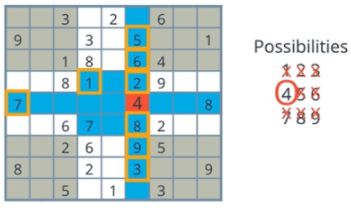

In [8]:
def eliminasi(nilai_):
    nilai = copy(nilai_)
    for boks in nilai:
        if len(nilai[boks]) > 1:
            for ka in kawan(boks):
                if len(nilai[ka]) == 1:
                    nilai[boks] = nilai[boks].replace(nilai[ka], '')      
    return nilai

print('Sebelum eliminasi:')
tampilkan(nilai_1)

print('Setelah eliminasi ke-1:')
tampilkan(eliminasi(nilai_1))

Sebelum eliminasi:
 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . . | . . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | . . 9 
 . . 5 | . 1 . | 3 . . 
Setelah eliminasi ke-1:
 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | 7 . 9 
 . . 5 | 4 1 7 | 3 . . 


In [9]:
# Mari coba iterasi hingga solusinya kita dapatkan
coba = copy(nilai_1)
tampilkan(coba)
i = 0
while len([b for b in coba.keys() if len(coba[b])==1]) != 81:
    coba = eliminasi(coba)
    print(f'Eliminasi ke-{i+1}')
    tampilkan(coba)
    i +=1

 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . . | . . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | . . 9 
 . . 5 | . 1 . | 3 . . 
Eliminasi ke-1
 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | 7 . 9 
 . . 5 | 4 1 7 | 3 . . 
Eliminasi ke-2
 . . 3 | 9 2 1 | 6 . . 
 9 . . | 3 . 5 | 8 . 1 
 . . 1 | 8 7 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . 9 | 5 . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 8 9 | 5 . 4 
 8 . 4 | 2 5 3 | 7 . 9 
 6 9 5 | 4 1 7 | 3 . 2 
Eliminasi ke-3
 . . 3 | 9 2 1 | 6 . . 
 9 . 7 | 3 4 5 | 8 2 1 
 . . 1 | 8 7 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . 9 | 5 . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 

Ternyata dengan strategi Eliminasi, kita cukup melakukan 7 iterasi dalam menyelesaikan papan Sudoku kita yang satu ini.

Sudah puas? Belum! Masih ada strategi lain.

## Strategi "Satu-Satunya Pilihan"

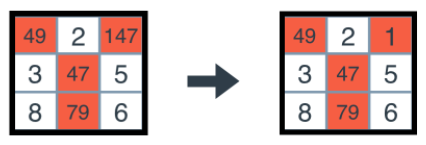

Jika dalam satu unit baris/kolom/kotak terdapat suatu digit yang ada hanya di satu boks, maka boks tersebut hanyalah satu-satunya pilihan digit tersebut di simpan.

Lihat gambar di atas. Dalam unit kotak tersebut, digit 1 hanya ada di boks sudut kanan atas. Maka kita bisa mengabaikan digit 4 dan 7 di boks tersebut dan langsung menuliskan 1 di dalamnya.

In [10]:
def satu_pilihan(nilai_):
    nilai = copy(nilai_)
    for unit in daftar_unit:
        for digit in '123456789':
            ada_digit = [box for box in unit if digit in nilai[box]]
            if len(ada_digit) == 1:
                nilai[ada_digit[0]] = digit
    return nilai

In [11]:
tampilkan(nilai_1)
print()
tampilkan(satu_pilihan(nilai_1))

 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . . | . . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | . . 9 
 . . 5 | . 1 . | 3 . . 

 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . . | . . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | . . 9 
 . . 5 | . 1 . | 3 . . 


## Bungkus!

Dalam fungsi `selesaikan_sudoku`, pertama kita akan menghitung jumlahnya boks yang sudah beres (panjang stringnya 1) di `boks_beres`. Kemudian kita melakukan strategi `eliminasi` dan `satu_pilihan`, lalu hitung kembali jumlah boks beres setelah kedua strategi diterapkan. Jika tidak ada boks tambahan yang diisi dalam satu langkah strategi, maka fungsi akan berhenti.

In [12]:
def selesaikan_sudoku(nilai_, strategi=[eliminasi, satu_pilihan]):
    nilai = copy(nilai_)
    tidak_berubah = False
    
    while not tidak_berubah:
        
        boks_beres = len([b for b in nilai.keys() if len(nilai[b])==1])
        boks_beres_s = boks_beres
        
        for s in strategi:
            nilai = s(nilai)
            boks_beres_baru = len([b for b in nilai.keys() if len(nilai[b])==1])
            
            if boks_beres_baru != boks_beres_s:
                print()
                print(s.__name__, 'menyelesaikan:', boks_beres_s, '->', boks_beres_baru)
                tampilkan(nilai)
                boks_beres_s = boks_beres_baru
        
        tidak_berubah = boks_beres_baru == boks_beres
        
        if len([b for b in nilai.keys() if len(nilai[b]) == 0]):
            return False
        
    return nilai

In [13]:
print(selesaikan_sudoku(nilai_1))


eliminasi menyelesaikan: 32 -> 37
 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | 7 . 9 
 . . 5 | 4 1 7 | 3 . . 

satu_pilihan menyelesaikan: 37 -> 55
 . 8 3 | 9 2 1 | 6 . . 
 9 6 . | 3 4 5 | 8 . 1 
 2 . 1 | 8 7 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 2 9 | 5 . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 8 9 | 5 . . 
 8 . . | 2 5 3 | 7 6 9 
 6 9 5 | 4 1 7 | 3 8 2 

eliminasi menyelesaikan: 55 -> 62
 . 8 3 | 9 2 1 | 6 . . 
 9 6 7 | 3 4 5 | 8 2 1 
 2 5 1 | 8 7 6 | 4 . 3 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 2 9 | 5 . 4 | 1 3 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 8 9 | 5 . 4 
 8 . 4 | 2 5 3 | 7 6 9 
 6 9 5 | 4 1 7 | 3 8 2 

satu_pilihan menyelesaikan: 62 -> 75
 4 8 3 | 9 2 1 | 6 5 7 
 9 6 7 | 3 4 5 | 8 2 1 
 2 5 1 | 8 7 6

### Coba Sudoku yang lebih sulit

In [14]:
sudoku_2 = '4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'
nilai_2 = nilai_boks(sudoku_2)
print(selesaikan_sudoku(nilai_2))


satu_pilihan menyelesaikan: 17 -> 20
 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . 4 . | . 1 . | . . . 
-------+-------+-------
 . . . | 6 . 3 | . 7 . 
 5 . 3 | 2 . 1 | . . . 
 1 . 4 | . . . | . . . 
{'A1': '4', 'A2': '1679', 'A3': '12679', 'A4': '139', 'A5': '2369', 'A6': '269', 'A7': '8', 'A8': '1239', 'A9': '5', 'B1': '26789', 'B2': '3', 'B3': '1256789', 'B4': '14589', 'B5': '24569', 'B6': '245689', 'B7': '12679', 'B8': '1249', 'B9': '124679', 'C1': '2689', 'C2': '15689', 'C3': '125689', 'C4': '7', 'C5': '234569', 'C6': '245689', 'C7': '12369', 'C8': '12349', 'C9': '123469', 'D1': '3789', 'D2': '2', 'D3': '15789', 'D4': '3459', 'D5': '34579', 'D6': '4579', 'D7': '13579', 'D8': '6', 'D9': '13789', 'E1': '3679', 'E2': '15679', 'E3': '15679', 'E4': '359', 'E5': '8', 'E6': '25679', 'E7': '4', 'E8': '12359', 'E9': '12379', 'F1': '36789', 'F2': '4', 'F3': '56789', 'F4': '359', 'F5': '1', 

Ah, ternyata algoritma kita tidak bisa maju!

Kita harus memikirkan strategi lain...

## Strategi "Search"

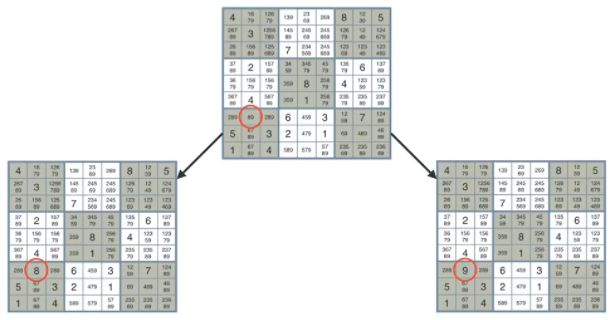

**Depth First Search**

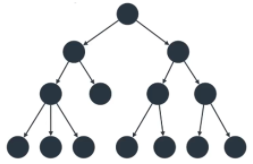

Dalam fungsi `search`, ini langkah yang akan kita ambil
1. Reduksi nilai di papan menggunakan `eliminasi` dan `satu_pilihan`
2. Pilih salah satu boks yang punya kemungkinan digit yang paling sedikit
3. Gunakan fungsi rekursif untuk menyelesaikan setiap papan sudoku, lalu jika hasilnya selesai `True`, kembalikan papan yang telah beres tersebut!

Wow, panjang sekali perjalanan mencari solusinya! Namun, pada akhirnya solusi itu kita dapatkan dengan algoritma *Depth First Search*.

In [15]:
def search(nilai, strategi=[eliminasi, satu_pilihan]):

    nilai = selesaikan_sudoku(nilai, strategi)
    
    if nilai is False:
        return nilai # gagal di cabang sekarang
    
    if len([b for b in nilai.keys() if len(nilai[b])==1]) == 81:
        return True # berhasil!
    
    print("Stuck! Ganti cabang!\n===================")
    n, s = min((len(nilai[s]), s) for s in boks if len(nilai[s]) > 1)
    for nilai_ in nilai[s]:
        nilai_baru = copy(nilai)
        nilai_baru[s] = nilai_
        coba_lagi = search(nilai_baru)
        if coba_lagi:
            return coba_lagi

In [16]:
print('Papan Awal')
tampilkan(nilai_2)
# depth first search
search(nilai_2)

Papan Awal
 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . . . | . 1 . | . . . 
-------+-------+-------
 . . . | 6 . 3 | . 7 . 
 5 . . | 2 . . | . . . 
 1 . 4 | . . . | . . . 

satu_pilihan menyelesaikan: 17 -> 20
 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . 4 . | . 1 . | . . . 
-------+-------+-------
 . . . | 6 . 3 | . 7 . 
 5 . 3 | 2 . 1 | . . . 
 1 . 4 | . . . | . . . 
Stuck! Ganti cabang!
Stuck! Ganti cabang!

eliminasi menyelesaikan: 22 -> 23
 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . 4 . | . 1 . | . . . 
-------+-------+-------
 2 8 9 | 6 . 3 | . 7 . 
 5 . 3 | 2 . 1 | . . . 
 1 . 4 | . . . | . . . 
Stuck! Ganti cabang!

eliminasi menyelesaikan: 24 -> 25
 4 . . | . . . | 8 . 5 
 .

True

Yey, berhasil!

## Strategi "Naked Twins"

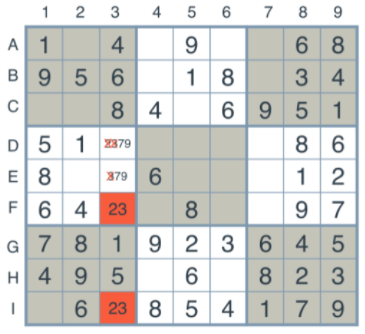

In [17]:
from collections import Counter

def naked_twin(nilai):
    for unit in daftar_unit:
        n_unit = {p:nilai[p] for p in unit}
        counts = Counter(n_unit.values())
        twin_digits = [d for d in counts if len(d)==counts[d] and len(d)>1]
        for d in twin_digits:
            twin = [p for p in unit if len(nilai[p])==2 and nilai[p]==d]
            for p in [p for p in unit if p not in twin]:
                nilai[p] = ''.join([s for s in nilai[p] if s not in d])
    return nilai

In [18]:
strategi = [eliminasi, satu_pilihan, naked_twin]
nilai = copy(nilai_1)
for i in range(3):
    for s in strategi:
        print(s.__name__)
        nilai = s(nilai)
        tampilkan(nilai)

eliminasi
 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | 7 . 9 
 . . 5 | 4 1 7 | 3 . . 
satu_pilihan
 . 8 3 | 9 2 1 | 6 . . 
 9 6 . | 3 4 5 | 8 . 1 
 2 . 1 | 8 7 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 2 9 | 5 . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 8 9 | 5 . . 
 8 . . | 2 5 3 | 7 6 9 
 6 9 5 | 4 1 7 | 3 8 2 
naked_twin
 . 8 3 | 9 2 1 | 6 . . 
 9 6 . | 3 4 5 | 8 . 1 
 2 . 1 | 8 7 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 2 9 | 5 . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 8 9 | 5 . . 
 8 . . | 2 5 3 | 7 6 9 
 6 9 5 | 4 1 7 | 3 8 2 
eliminasi
 . 8 3 | 9 2 1 | 6 . . 
 9 6 7 | 3 4 5 | 8 2 1 
 2 5 1 | 8 7 6 | 4 . 3 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 2 9 | 5 . 4 | 1 3 8 
 . . 6 | 7 . 8 | 2 .

In [19]:
def selesaikan_sudoku_(nilai_, strategi=[eliminasi, satu_pilihan]):
    nilai = copy(nilai_)
    tidak_berubah = False # apakah jumlah boks yang diselesaikan berubah setelah strategi diterapkan
    
    while not tidak_berubah:
        boks_beres = len([b for b in nilai.keys() if len(nilai[b])==1])
        boks_beres_s = boks_beres
        for s in strategi:
            nilai = s(nilai)
            boks_beres_baru = len([b for b in nilai.keys() if len(nilai[b])==1])
            if boks_beres_baru != boks_beres_s:
                print(s.__name__, 'menyelesaikan :', boks_beres_s, '->', boks_beres_baru)
                tampilkan(nilai); print()
                boks_beres_s = boks_beres_baru
        tidak_berubah = boks_beres_baru == boks_beres
        if len([b for b in nilai.keys() if len(nilai[b]) == 0]):
            return False
    return nilai

In [20]:
def search_(nilai):

    nilai = selesaikan_sudoku(nilai)
    
    if nilai is False:
        return nilai # gagal di cabang sekarang
    
    if len([b for b in nilai.keys() if len(nilai[b])==1]) == 81:
        return True # berhasil!
    
    print("Stuck! Ganti cabang!\n===================")
    n, s = min((len(nilai[s]), s) for s in boks if len(nilai[s]) > 1)
    for nilai_ in nilai[s]:
        nilai_baru = copy(nilai)
        nilai_baru[s] = nilai_
        coba_lagi = search(nilai_baru)
        if coba_lagi:
            return coba_lagi

In [21]:
print('Papan Awal')
tampilkan(nilai_1)
search_(nilai_1)

Papan Awal
 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . . | . . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | . . 9 
 . . 5 | . 1 . | 3 . . 

eliminasi menyelesaikan: 32 -> 37
 . . 3 | . 2 . | 6 . . 
 9 . . | 3 . 5 | . . 1 
 . . 1 | 8 . 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 . . | . . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 . 9 | 5 . . 
 8 . . | 2 . 3 | 7 . 9 
 . . 5 | 4 1 7 | 3 . . 

satu_pilihan menyelesaikan: 37 -> 55
 . 8 3 | 9 2 1 | 6 . . 
 9 6 . | 3 4 5 | 8 . 1 
 2 . 1 | 8 7 6 | 4 . . 
-------+-------+-------
 . . 8 | 1 . 2 | 9 . . 
 7 2 9 | 5 . 4 | 1 . 8 
 . . 6 | 7 . 8 | 2 . . 
-------+-------+-------
 . . 2 | 6 8 9 | 5 . . 
 8 . . | 2 5 3 | 7 6 9 
 6 9 5 | 4 1 7 | 3 8 2 

eliminasi menyelesaikan: 55 -> 62
 . 8 3 | 9 2 1 | 6 . . 
 9 6 7 | 3 4 5 | 8 2 1 
 2 5 1 | 8 7 6 | 4 . 3 
-------+-------+-

True

In [22]:
print('Papan Awal')
tampilkan(nilai_2)
search_(nilai_2)

Papan Awal
 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . . . | . 1 . | . . . 
-------+-------+-------
 . . . | 6 . 3 | . 7 . 
 5 . . | 2 . . | . . . 
 1 . 4 | . . . | . . . 

satu_pilihan menyelesaikan: 17 -> 20
 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . 4 . | . 1 . | . . . 
-------+-------+-------
 . . . | 6 . 3 | . 7 . 
 5 . 3 | 2 . 1 | . . . 
 1 . 4 | . . . | . . . 
Stuck! Ganti cabang!
Stuck! Ganti cabang!

eliminasi menyelesaikan: 22 -> 23
 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . 4 . | . 1 . | . . . 
-------+-------+-------
 2 8 9 | 6 . 3 | . 7 . 
 5 . 3 | 2 . 1 | . . . 
 1 . 4 | . . . | . . . 
Stuck! Ganti cabang!

eliminasi menyelesaikan: 24 -> 25
 4 . . | . . . | 8 . 5 
 .

True

## Sudoku Diagonal

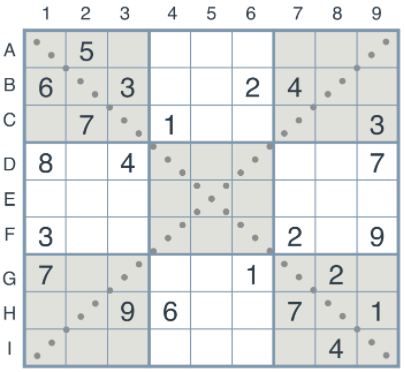

Sebelumnya, kita tahu bahwa masalah Sudoku memiliki konstrain bahwa tidak ada digit yang boleh berulang
1. Untuk setiap unit baris
2. Untuk setiap unit kolom
3. Untuk setiap unit kotak 3x3

Sekarang, bagaimana jika konstrainnya kita tambah pada **unit diagonal** seperti gambar di atas?

Oke, mari kita coba! Sekalian membungkus kembali fungsi-fungsi yang sudah kita siapkan sebelumnya.

In [23]:
from copy import copy
from collections import Counter

In [24]:
# Menyiapkan papan Sudoku

def kali_silang(a, b):
    return [x+y for x in a for y in b]

baris = 'ABCDEFGHI'
kolom = '123456789'
boks = kali_silang(baris, kolom)

unit_baris = [kali_silang(b, kolom) for b in baris]
unit_kolom = [kali_silang(baris, k) for k in kolom]
kelompok_baris = ('ABC', 'DEF', 'GHI')
kelompok_kolom = ('123', '456', '789')
unit_kotak = [kali_silang(kb, kk) for kb in kelompok_baris \
                  for kk in kelompok_kolom]

def daftar_unit():
    # sekarang kita tambahkan unit diagonal
    d1 = [baris[i]+kolom[i] for i in range(len(baris))]
    d2 = [baris[i]+kolom[8-i] for i in range(len(baris))]
    unit_diagonal = [d1, d2]
    
    return unit_baris + unit_kolom + unit_kotak + unit_diagonal

In [25]:
# Fungsi-fungsi pembantu

def kawan(s):
    kawan_ = []
    for unit in daftar_unit():
        if s in unit: kawan_.extend(unit)
    return [k for k in kawan_ if k != s]

def nilai_boks(state):
    assert len(state) == 81
    d = dict(zip(boks, state))
    for b in d:
        if d[b] == '.':
            d[b] = '123456789'
    return d

def tampilkan(nilai_):
    nilai = copy(nilai_)
    for b in nilai:
        if len(nilai[b]) > 1:
            nilai[b] = '.'
    lebar = 1+max(len(nilai[s]) for s in boks)
    bar = '+'.join(['-'*7]*3)
    for b in baris:
        print('', ''.join(nilai[b+k].center(lebar)+('| ' if k in '36' else '')
                      for k in kolom))
        if b in 'CF': print(bar)

In [26]:
# Strategi constraint propagation yang digunakan

def eliminasi(nilai_):
    nilai = copy(nilai_)
    for boks in nilai:
        if len(nilai[boks]) > 1:
            for ka in kawan(boks):
                if len(nilai[ka]) == 1:
                    nilai[boks] = nilai[boks].replace(nilai[ka], '')      
    return nilai

def satu_pilihan(nilai_):
    nilai = copy(nilai_)
    for unit in daftar_unit():
        for digit in '123456789':
            ada_digit = [box for box in unit if digit in nilai[box]]
            if len(ada_digit) == 1:
                nilai[ada_digit[0]] = digit
    return nilai

def naked_twin(nilai):
    for unit in daftar_unit():
        n_unit = {p:nilai[p] for p in unit}
        counts = Counter(n_unit.values())
        twin_digits = [d for d in counts if len(d)==counts[d] and len(d)>1]
        for d in twin_digits:
            twin = [p for p in unit if len(nilai[p])==2 and nilai[p]==d]
            for p in [p for p in unit if p not in twin]:
                nilai[p] = ''.join([s for s in nilai[p] if s not in d])
    return nilai

In [27]:
# Mengumpulkan semua strategi

def selesaikan_sudoku(nilai_, strategi):
    nilai = copy(nilai_)
    tidak_berubah = False
    while not tidak_berubah:
        boks_beres = len([b for b in nilai.keys() if len(nilai[b])==1])
        boks_beres_s = boks_beres
        for s in strategi:
            nilai = s(nilai)
            boks_beres_baru = len([b for b in nilai.keys() if len(nilai[b])==1])
            if boks_beres_baru != boks_beres_s:
                print(s.__name__, 'menyelesaikan :', boks_beres_s, '->', boks_beres_baru)
                tampilkan(nilai); print()
                boks_beres_s = boks_beres_baru
        tidak_berubah = boks_beres_baru == boks_beres
        if len([b for b in nilai.keys() if len(nilai[b]) == 0]):
            return False, nilai
    return nilai, ""

In [28]:
# Algoritma depth-first search

def search(nilai, strategi=[eliminasi, naked_twin, satu_pilihan]):
    nilai, state = selesaikan_sudoku(nilai, strategi)
    if nilai is False:
        return state # gagal!
    if len([b for b in nilai.keys() if len(nilai[b])==1]) == 81:
        return True # berhasil!
    print("Stuck! Ganti cabang!\n===================")
    n, s = min((len(nilai[s]), s) for s in boks if len(nilai[s]) > 1)
    for nilai_ in nilai[s]:
        nilai_baru = copy(nilai)
        nilai_baru[s] = nilai_
        coba_lagi = search(nilai_baru)
        if coba_lagi:
            return coba_lagi

Kita akan uji kode di atas dengan gambar Sudoku Diagonal yang satu ini.

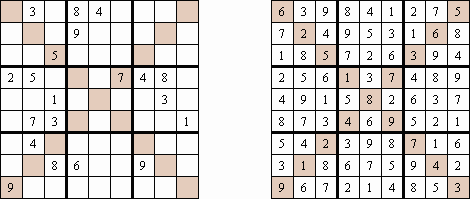

In [29]:
# Terapkan!
SD = '.3.84.......9.......5......25...748...1....3..73.....1.4.........86..9..9........'
nilai_SD = nilai_boks(SD)
print('Papan Awal')
tampilkan(nilai_SD)

Papan Awal
 . 3 . | 8 4 . | . . . 
 . . . | 9 . . | . . . 
 . . 5 | . . . | . . . 
-------+-------+-------
 2 5 . | . . 7 | 4 8 . 
 . . 1 | . . . | . 3 . 
 . 7 3 | . . . | . . 1 
-------+-------+-------
 . 4 . | . . . | . . . 
 . . 8 | 6 . . | 9 . . 
 9 . . | . . . | . . . 


In [36]:
search(nilai_SD)

satu_pilihan menyelesaikan : 20 -> 24
 . 3 . | 8 4 . | . . . 
 . . 4 | 9 . . | . . . 
 . . 5 | . . . | 3 . . 
-------+-------+-------
 2 5 . | . . 7 | 4 8 . 
 . . 1 | . 8 . | . 3 . 
 . 7 3 | . . 9 | . . 1 
-------+-------+-------
 . 4 . | . . . | . . . 
 . . 8 | 6 . . | 9 . . 
 9 . . | . . . | . . . 

naked_twin menyelesaikan : 24 -> 26
 . 3 . | 8 4 . | . . . 
 . . 4 | 9 . . | . . . 
 . . 5 | . . . | 3 . . 
-------+-------+-------
 2 5 . | . . 7 | 4 8 . 
 4 . 1 | . 8 . | . 3 . 
 . 7 3 | 4   9 |     1 
-------+-------+-------
 . 4 . | . . . | . . . 
 . . 8 | 6 . . | 9 . . 
 9 . . | . . . | . . . 

satu_pilihan menyelesaikan : 26 -> 33
 . 3 9 | 8 4 . | . . . 
 . . 4 | 9 . . | . . . 
 . 8 5 | . . . | 3 . . 
-------+-------+-------
 2 5 6 | . . 7 | 4 8 . 
 4 9 1 | . 8 6 | . 3 . 
 8 7 3 | 4   9 |     1 
-------+-------+-------
 . 4 . | . 9 . | . . . 
 . . 8 | 6 . . | 9 . . 
 9 . . | . . . | . . . 



{'A1': '167',
 'A2': '3',
 'A3': '9',
 'A4': '8',
 'A5': '4',
 'A6': '1256',
 'A7': '12567',
 'A8': '125679',
 'A9': '256',
 'B1': '1678',
 'B2': '126',
 'B3': '4',
 'B4': '9',
 'B5': '123567',
 'B6': '12356',
 'B7': '125678',
 'B8': '1256',
 'B9': '25678',
 'C1': '1678',
 'C2': '8',
 'C3': '5',
 'C4': '127',
 'C5': '1267',
 'C6': '126',
 'C7': '3',
 'C8': '124679',
 'C9': '246789',
 'D1': '2',
 'D2': '5',
 'D3': '6',
 'D4': '13',
 'D5': '13',
 'D6': '7',
 'D7': '4',
 'D8': '8',
 'D9': '69',
 'E1': '4',
 'E2': '9',
 'E3': '1',
 'E4': '245',
 'E5': '8',
 'E6': '6',
 'E7': '2567',
 'E8': '3',
 'E9': '25679',
 'F1': '8',
 'F2': '7',
 'F3': '3',
 'F4': '4',
 'F5': '',
 'F6': '9',
 'F7': '',
 'F8': '',
 'F9': '1',
 'G1': '13567',
 'G2': '4',
 'G3': '26',
 'G4': '12357',
 'G5': '9',
 'G6': '12358',
 'G7': '1267',
 'G8': '12567',
 'G9': '235678',
 'H1': '1357',
 'H2': '12',
 'H3': '8',
 'H4': '6',
 'H5': '12357',
 'H6': '12345',
 'H7': '9',
 'H8': '1247',
 'H9': '23457',
 'I1': '9',
 'I2': '1

Hm? Tidak berhasil?

In [37]:
search(nilai_SD, strategi=[eliminasi, satu_pilihan])

satu_pilihan menyelesaikan : 20 -> 24
 . 3 . | 8 4 . | . . . 
 . . 4 | 9 . . | . . . 
 . . 5 | . . . | 3 . . 
-------+-------+-------
 2 5 . | . . 7 | 4 8 . 
 . . 1 | . 8 . | . 3 . 
 . 7 3 | . . 9 | . . 1 
-------+-------+-------
 . 4 . | . . . | . . . 
 . . 8 | 6 . . | 9 . . 
 9 . . | . . . | . . . 

satu_pilihan menyelesaikan : 24 -> 32
 . 3 9 | 8 4 . | . . . 
 . . 4 | 9 . . | . . . 
 . 8 5 | . . . | 3 . . 
-------+-------+-------
 2 5 6 | . . 7 | 4 8 . 
 4 9 1 | . 8 . | . 3 . 
 8 7 3 | 4 . 9 | . . 1 
-------+-------+-------
 . 4 . | . 9 . | . . . 
 . . 8 | 6 . . | 9 . . 
 9 . . | . . . | . . . 

eliminasi menyelesaikan : 32 -> 37
 . 3 9 | 8 4 . | . . . 
 . . 4 | 9 . . | . . . 
 . 8 5 | . . . | 3 . . 
-------+-------+-------
 2 5 6 | . . 7 | 4 8 9 
 4 9 1 | . 8 . | . 3 . 
 8 7 3 | 4 . 9 | . . 1 
-------+-------+-------
 . 4 2 | . 9 . | . . . 
 . 1 8 | 6 . . | 9 . . 
 9 6 7 | . . . | . . . 

satu_pilihan menyelesaikan : 37 -> 40
 . 3 9 | 8 4 . | . . . 
 . 2 4 | 9 . . | . . . 
 . 8 5 |

True

Easy ;)

### Diagonal yang lebih banyak lagi

Bagaimana dengan unit diagonal yang lebih banyak?

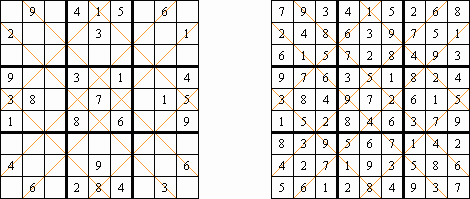

In [38]:
def daftar_unit():
    # definisikan ulang unit diagonal
    unit_diagonal = []
    for j in [1, 4]:
        unit_diagonal.append([baris[i]+kolom[i+j] for i in range(len(baris)-j)])
        unit_diagonal.append([baris[i+j]+kolom[i] for i in range(len(baris)-j)])
        unit_diagonal.append([baris[i]+kolom[8-i-j] for i in range(len(baris)-j)])
        unit_diagonal.append([baris[i+j]+kolom[8-i] for i in range(len(baris)-j)])

    # kumpulkan semua unit
    return unit_baris + unit_kolom + unit_kotak + unit_diagonal

In [39]:
# mengecek ketepatan unit diagonal
for unit in daftar_unit()[-8:]:
    kosongan = nilai_boks('.'*81)
    for p in unit:
        kosongan[p] = p[0]
    tampilkan(kosongan)
    print()

 . A . | . . . | . . . 
 . . B | . . . | . . . 
 . . . | C . . | . . . 
-------+-------+-------
 . . . | . D . | . . . 
 . . . | . . E | . . . 
 . . . | . . . | F . . 
-------+-------+-------
 . . . | . . . | . G . 
 . . . | . . . | . . H 
 . . . | . . . | . . . 

 . . . | . . . | . . . 
 B . . | . . . | . . . 
 . C . | . . . | . . . 
-------+-------+-------
 . . D | . . . | . . . 
 . . . | E . . | . . . 
 . . . | . F . | . . . 
-------+-------+-------
 . . . | . . G | . . . 
 . . . | . . . | H . . 
 . . . | . . . | . I . 

 . . . | . . . | . A . 
 . . . | . . . | B . . 
 . . . | . . C | . . . 
-------+-------+-------
 . . . | . D . | . . . 
 . . . | E . . | . . . 
 . . F | . . . | . . . 
-------+-------+-------
 . G . | . . . | . . . 
 H . . | . . . | . . . 
 . . . | . . . | . . . 

 . . . | . . . | . . . 
 . . . | . . . | . . B 
 . . . | . . . | . C . 
-------+-------+-------
 . . . | . . . | D . . 
 . . . | . . E | . . . 
 . . . | . F . | . . . 
-------+-------+-------
 . . . | G . 

In [40]:
SDD = '.9.415.6.2...3...1.........9..3.1..438..7..151..8.6..9.........4...9...6.6.284.3.'
nilai_SDD = nilai_boks(SDD)
print('Papan Awal')
tampilkan(nilai_SDD)

Papan Awal
 . 9 . | 4 1 5 | . 6 . 
 2 . . | . 3 . | . . 1 
 . . . | . . . | . . . 
-------+-------+-------
 9 . . | 3 . 1 | . . 4 
 3 8 . | . 7 . | . 1 5 
 1 . . | 8 . 6 | . . 9 
-------+-------+-------
 . . . | . . . | . . . 
 4 . . | . 9 . | . . 6 
 . 6 . | 2 8 4 | . 3 . 


In [41]:
search(nilai_SDD)

eliminasi menyelesaikan : 29 -> 40
 . 9 . | 4 1 5 | . 6 . 
 2 . . | . 3 . | . . 1 
 . . . | 7 . . | . . . 
-------+-------+-------
 9 . . | 3 . 1 | . . 4 
 3 8 . | 9 7 2 | 6 1 5 
 1 . . | 8 . 6 | 3 . 9 
-------+-------+-------
 . . . | 5 6 7 | . . . 
 4 . . | 1 9 3 | . . 6 
 . 6 . | 2 8 4 | . 3 7 

satu_pilihan menyelesaikan : 40 -> 61
 . 9 3 | 4 1 5 | . 6 . 
 2 . . | 6 3 9 | . . 1 
 6 1 4 | 7 . . | 3 8 . 
-------+-------+-------
 9 2 6 | 3 5 1 | 7 . 4 
 3 8 4 | 9 7 2 | 6 1 5 
 1 4 . | 8 4 6 | 3 2 9 
-------+-------+-------
 . 3 5 | 5 6 7 | 1 . . 
 4 . 3 | 1 9 3 | 5 . 6 
 . 6 . | 2 8 4 | . 3 7 

eliminasi menyelesaikan : 61 -> 70
 . 9 3 | 4 1 5 | 2 6   
 2 . 8 | 6 3 9 |   . 1 
 6 1 4 | 7 2   | 3 8   
-------+-------+-------
 9 2 6 | 3 5 1 | 7   4 
 3 8 4 | 9 7 2 | 6 1 5 
 1 4 7 | 8 4 6 | 3 2 9 
-------+-------+-------
 8 3 5 | 5 6 7 | 1 4 2 
 4 7 3 | 1 9 3 | 5   6 
   6 . | 2 8 4 | 9 3 7 

satu_pilihan menyelesaikan : 70 -> 74
 7 9 3 | 4 1 5 | 2 6   
 2 5 8 | 6 3 9 |   4 1 
 6 1 4 | 7 

{'A1': '7',
 'A2': '9',
 'A3': '3',
 'A4': '4',
 'A5': '1',
 'A6': '5',
 'A7': '2',
 'A8': '6',
 'A9': '',
 'B1': '2',
 'B2': '5',
 'B3': '8',
 'B4': '6',
 'B5': '3',
 'B6': '9',
 'B7': '',
 'B8': '4',
 'B9': '1',
 'C1': '6',
 'C2': '1',
 'C3': '4',
 'C4': '7',
 'C5': '2',
 'C6': '',
 'C7': '3',
 'C8': '8',
 'C9': '',
 'D1': '9',
 'D2': '2',
 'D3': '6',
 'D4': '3',
 'D5': '5',
 'D6': '1',
 'D7': '7',
 'D8': '',
 'D9': '4',
 'E1': '3',
 'E2': '8',
 'E3': '4',
 'E4': '9',
 'E5': '7',
 'E6': '2',
 'E7': '6',
 'E8': '1',
 'E9': '5',
 'F1': '1',
 'F2': '4',
 'F3': '7',
 'F4': '8',
 'F5': '4',
 'F6': '6',
 'F7': '3',
 'F8': '2',
 'F9': '9',
 'G1': '8',
 'G2': '3',
 'G3': '5',
 'G4': '5',
 'G5': '6',
 'G6': '7',
 'G7': '1',
 'G8': '4',
 'G9': '2',
 'H1': '4',
 'H2': '7',
 'H3': '3',
 'H4': '1',
 'H5': '9',
 'H6': '3',
 'H7': '5',
 'H8': '',
 'H9': '6',
 'I1': '',
 'I2': '6',
 'I3': '1',
 'I4': '2',
 'I5': '8',
 'I6': '4',
 'I7': '9',
 'I8': '3',
 'I9': '7'}

Hm.. dia kesulitan. Bagaimana kalau strateginya kita ubah lagi?

In [42]:
search(nilai_SDD, [eliminasi]) # gunakan teknik eliminasi saja

eliminasi menyelesaikan : 29 -> 40
 . 9 . | 4 1 5 | . 6 . 
 2 . . | . 3 . | . . 1 
 . . . | 7 . . | . . . 
-------+-------+-------
 9 . . | 3 . 1 | . . 4 
 3 8 . | 9 7 2 | 6 1 5 
 1 . . | 8 . 6 | 3 . 9 
-------+-------+-------
 . . . | 5 6 7 | . . . 
 4 . . | 1 9 3 | . . 6 
 . 6 . | 2 8 4 | . 3 7 

eliminasi menyelesaikan : 40 -> 52
 . 9 . | 4 1 5 | . 6 . 
 2 . . | 6 3 . | . . 1 
 . . . | 7 2 8 | . . 3 
-------+-------+-------
 9 . . | 3 5 1 | . . 4 
 3 8 4 | 9 7 2 | 6 1 5 
 1 . . | 8 4 6 | 3 . 9 
-------+-------+-------
 8 . . | 5 6 7 | . 4 2 
 4 . 7 | 1 9 3 | . . 6 
 5 6 . | 2 8 4 | . 3 7 

eliminasi menyelesaikan : 52 -> 73
 7 9 . | 4 1 5 | . 6 8 
 2 . 8 | 6 3 9 | 7 5 1 
 6 . 5 | 7 2 8 | 4 9 3 
-------+-------+-------
 9 . 6 | 3 5 1 | 8 . 4 
 3 8 4 | 9 7 2 | 6 1 5 
 1 . 2 | 8 4 6 | 3 7 9 
-------+-------+-------
 8 . 9 | 5 6 7 | 1 4 2 
 4 2 7 | 1 9 3 | 5 8 6 
 5 6 1 | 2 8 4 | 9 3 7 

eliminasi menyelesaikan : 73 -> 81
 7 9 3 | 4 1 5 | 2 6 8 
 2 4 8 | 6 3 9 | 7 5 1 
 6 1 5 | 7 2 8 | 

True

Dengan perubahan sedikit strategi, kita bisa menyelesaikannya. :)

Sepertinya strategi "Naked Twins" kita tidak cukup robust. Mengapa, ya?

Sudah dulu... Kita akhiri proyek ini! Alhamdulillah...